In [13]:
import graphviz

In [78]:
class Node:
    def __init__(self, label, color=None):
        self.label = label
        self.color = color

    def __str__(self):
        return f"(label: {self.label}, color: {self.color})"

    __repr__ = __str__

In [89]:
class Graph:
    def __init__(self, file_path=None, sol_path=None):
        self.nodes = {}
        self.neighbors = {}
        
        self.nb_vertices = 0
        self.nb_edges = 0

        self.nb_vertices_dominating_set = 0
        self.dominating_set = set()

        if file_path is not None:
            with open(file_path, 'r') as file:
                for line in file:
                    line = line.strip()
                    if not line or line.startswith('c'):
                        continue  # Ignore comment lines
                    
                    if line.startswith('p'):
                        parts = line.split()
                        if len(parts) != 4 or parts[1] != 'ds':
                            raise ValueError("Invalid problem descriptor in .gr file")
                        # We can extract n (vertices) and m (edges) if needed
                        self.nb_vertices, self.nb_edges = int(parts[2]), int(parts[3])
                        continue
                    
                    parts = line.split()
                    if len(parts) == 2:
                        try:
                            u, v = int(parts[0]), int(parts[1])
                            u = Node(str(u))
                            v = Node(str(v))
                            
                            self.add_node(u)
                            self.add_node(v)
                            self.add_edge(u,v)
                            edges.append((u, v))
                        except ValueError:
                            raise ValueError(f"Invalid edge definition: {line}")

        if (sol_path is not None) and (file_path is not None):
            with open(sol_path, 'r') as file:
                first_line_found = False
                for line in file:
                    line = line.strip()
                    if not line or line.startswith('c'):
                        continue  # Ignore comment lines

                    if not first_line_found:
                        self.nb_vertices_dominating_set = int(line[0])
                        first_line_found = True
                        continue

                    node_label = str(int(line))
                    node = self.nodes[node_label]
                    node.color = "red"
                    self.dominating_set.add(node)
        

    def add_node(self, node):
        if not node.label in self.nodes:
            self.nodes[node.label] = node
            self.neighbors[node.label] = []
            self.nb_vertices += 1

    def add_edge(self, node_1, node_2):
        assert(node_1.label in self.nodes.keys())
        assert(node_2.label in self.nodes.keys())
        assert(node_2.label not in self.neighbors[node_1.label])
        assert(node_1.label not in self.neighbors[node_2.label])
        self.neighbors[node_1.label].append(node_2.label)
        self.neighbors[node_2.label].append(node_1.label)

    def to_graphviz(self):
        g = graphviz.Graph()
        edges = []
        for node_label, node in self.nodes.items():
            g.node(node.label, fillcolor=node.color, style="filled")
            for neighbor_label in self.neighbors[node_label]:
                neighbor = self.nodes[neighbor_label]
                if (node.label, neighbor.label) not in edges and (neighbor.label, node.label) not in edges:
                    edges.append((node.label, neighbor.label))
        for i,j in edges:
            g.edge(i,j)
        return g

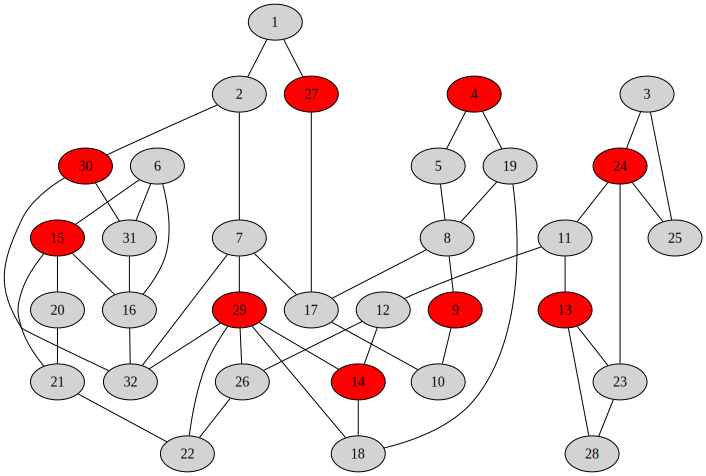

In [90]:
file_path = "tests/bremen_subgraph_20.gr"
sol_path = "tests/bremen_subgraph_20.sol"

graph = Graph(file_path, sol_path)
gv = graph.to_graphviz()
gv